In [1]:
from sklearn.datasets import load_files

In [2]:
import numpy as np

In [3]:
train_dir = '/Users/georgehardy/Desktop/MLPROJ/fruits-360/Training'
test_dir = '/Users/georgehardy/Desktop/MLPROJ/fruits-360/Test'



In [4]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [5]:
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

Loading complete!


In [6]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

1
(48905,)
<U87


In [7]:
no_of_classes = len(np.unique(y_train))



In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

Using TensorFlow backend.


In [9]:
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]



In [10]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img



In [11]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

In [12]:
x_train = np.array(convert_image_to_array(x_train))

x_valid = np.array(convert_image_to_array(x_valid))

x_test = np.array(convert_image_to_array(x_test))

In [13]:
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [15]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

In [17]:
model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

In [18]:
model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

In [19]:
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(95,activation = 'softmax'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        8256      
___________________________

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [21]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)



In [36]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=20,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Train on 48905 samples, validate on 7000 samples
Epoch 1/20
 - 218s - loss: 0.0666 - acc: 0.9861 - val_loss: 0.0877 - val_acc: 0.9839

Epoch 00001: val_loss did not improve from 0.07228
Epoch 2/20
 - 217s - loss: 0.0670 - acc: 0.9867 - val_loss: 0.0687 - val_acc: 0.9891

Epoch 00002: val_loss improved from 0.07228 to 0.06871, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/20
 - 218s - loss: 0.0775 - acc: 0.9864 - val_loss: 0.0890 - val_acc: 0.9850

Epoch 00003: val_loss did not improve from 0.06871
Epoch 4/20
 - 218s - loss: 0.0839 - acc: 0.9857 - val_loss: 0.0856 - val_acc: 0.9880

Epoch 00004: val_loss did not improve from 0.06871
Epoch 5/20
 - 229s - loss: 0.0802 - acc: 0.9865 - val_loss: 0.0637 - val_acc: 0.9913

Epoch 00005: val_loss improved from 0.06871 to 0.06366, saving model to cnn_from_scratch_fruits.hdf5
Epoch 6/20
 - 233s - loss: 0.0917 - acc: 0.9871 - val_loss: 0.0755 - val_acc: 0.9919

Epoch 00006: val_loss did not improve from 0.06366
Epoch 7/20
 - 225s - loss: 0.

In [23]:
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [37]:
import matplotlib.pyplot as plt
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

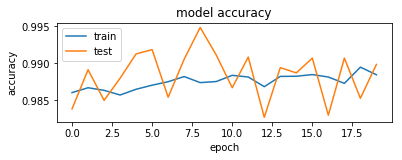

In [38]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

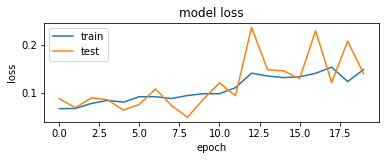

In [39]:
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

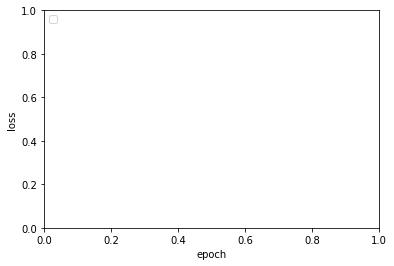

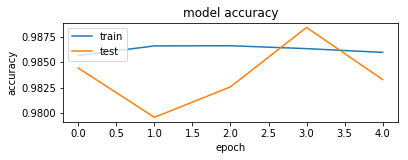

In [35]:
import matplotlib.pyplot as plt
plt.figure(1)


plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

